# Full Data Analysis of Heart Disease Prediction



### PART 1 and 2: Importing and Cleaning Up Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Import the necessary libraries: pandas for data manipulation,seaborn and matplotlib for graphical analysis


In [3]:
df=pd.read_csv('heart.csv')
df.head()
df.info()
print(df.describe())
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

* Displayed data using head, info,describe,duplicaated functions.<br>
* As we can see from the data, there are no duplicates, but there is two rows with missing Thal cells.<br>
* Since the two rows make up less than one percent of data, deleting entire rows will be inconsequential, so its faster and easier to delete the missing rows.
* We can also identify extreme outliers in Chol(565 mg/L vs 242 mg/L 50th prcentile), and Rest Bp (200 vs 130 50th percentile)

* Clean up data and remove incomplete information

In [4]:
df=df.dropna()

### PART 3 Exploratory Data Analysis (EDA)


#### 1.Checking  the distribution of 'age', 'cholesterol', and 'restbps' (resting blood pressure) using Univariate Analysis.<BR>


Text(0.5, 0, 'Age')

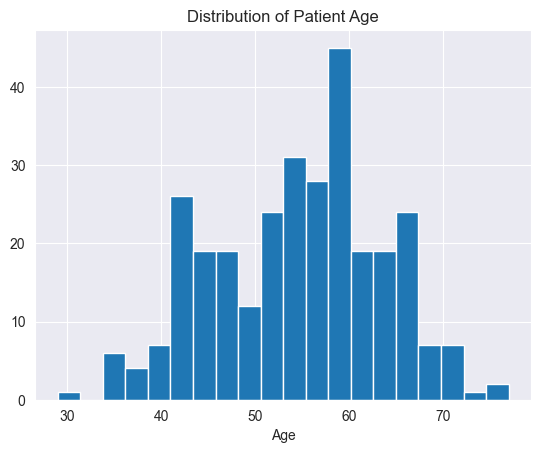

In [5]:
plt.hist(df['Age'],bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')

* used a histogram to display information about the age of the patients, as we can see the median age is 57.5-60

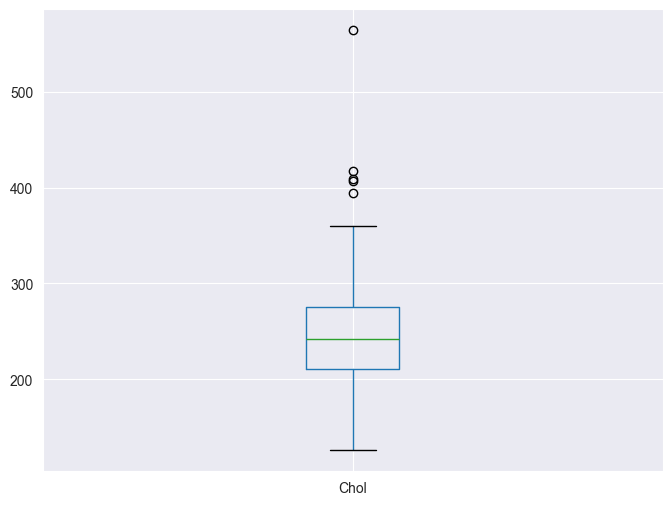

In [6]:
df.boxplot(column='Chol',figsize=(8,6))
plt.show()

* Used a boxplot to show data about cholesterol, as we can see the mean cholesterol level is around 250 mg/dL

### Male vs Female

<Axes: xlabel='Sex'>

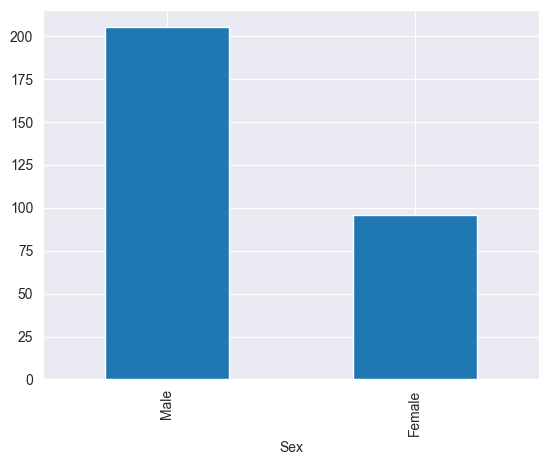

In [7]:
sex_labels = df['Sex'].map({0: 'Female', 1: 'Male'})
sex_counts=sex_labels.value_counts()
sex_counts.plot(kind='bar')

* We can see that from the 302 people sample, there is 200 male participants vs about 100 female participants, a considerable difference between numbers of males and females.

### Heart Disease vs No Heart Disease

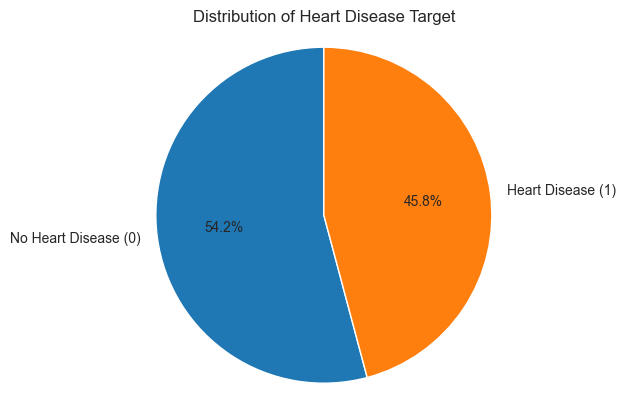

In [8]:
target_counts = df['Target'].value_counts()
target_labels = target_counts.index.map({0: 'No Heart Disease (0)', 1: 'Heart Disease (1)'})
plt.pie(
    target_counts,
    labels=target_labels,
    autopct='%1.1f%%',
    startangle=90,)
plt.title('Distribution of Heart Disease Target')
plt.axis('equal')
plt.show()

* We can see a moderate imbalance in the class balance of the targets(54.2% vs 45.8% from pie chart)

Text(0.5, 0, 'RestBP')

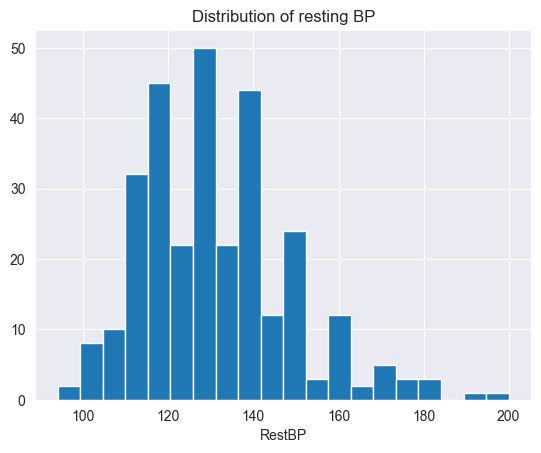

In [9]:
plt.hist(df['RestBP'],bins=20)
plt.title('Distribution of resting BP')
plt.xlabel('RestBP')

### Bivariate Analysis:

#### Age vs Cholestrol Correlation:

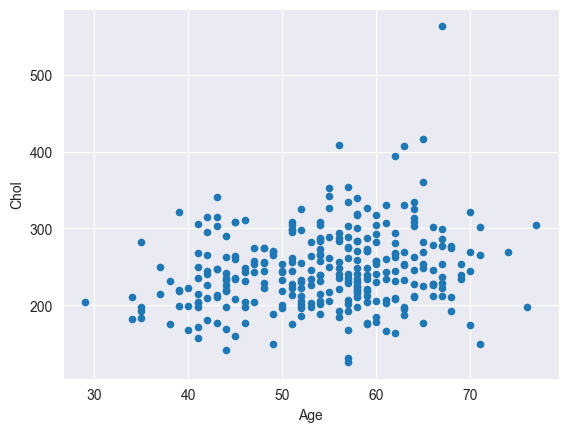

In [10]:
df.plot.scatter(x='Age',y='Chol')

plt.show()

* We can see that cholestrol level and age are not highly correlative and along the ages cholestrol level doesbt change much.
* We can identify an outlier at (67,565) but that is insignificant for our analysis.

#### Male vs Female resting Bp:

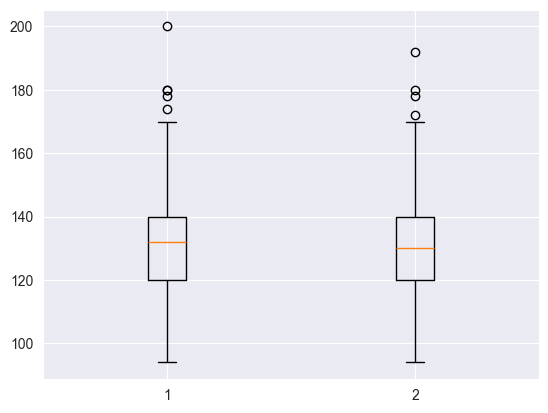

In [11]:
female_bp = df[sex_labels == 'Female']['RestBP']
male_bp = df[sex_labels == 'Male']['RestBP']
plt.boxplot([female_bp, male_bp])
plt.show()

* The resting heart rate of males and females are similar and we can see  slightly higher median for males (130 vs 135) and a higher range.
* We can see that maximum and minumum for males and females is similar.
* We can see an extreme outlier for male at 200 and 3 others at Bp higher than maximum range and als Extreme outlier at 193 for Females and 3 others above the maximum range

### Correlation Matrix:

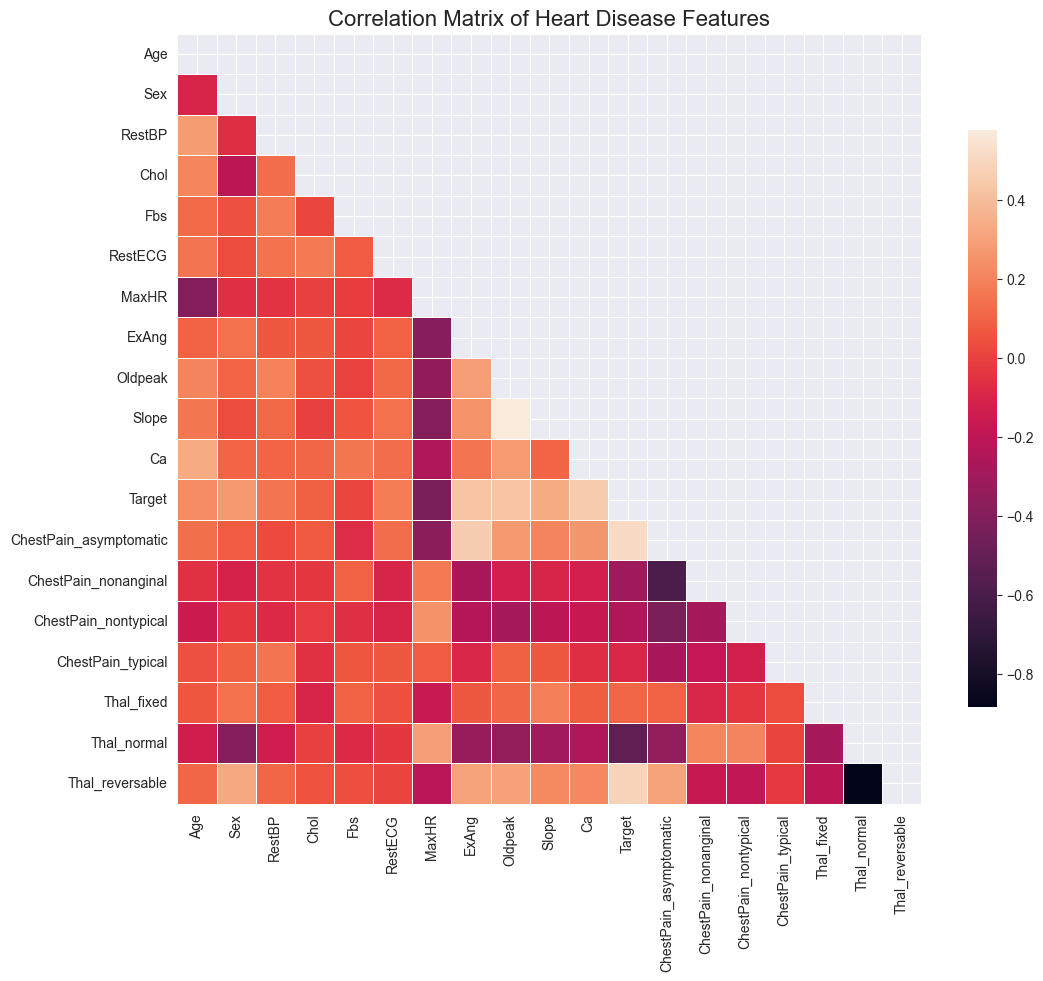

In [12]:
df['ChestPain'].unique()
df['ChestPain'].unique()
df_encoded = pd.get_dummies(df, columns=['ChestPain', 'Thal'])
co_mtx = df_encoded.corr(numeric_only=True)
mask = np.triu(np.ones_like(co_mtx, dtype=bool))
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
sns.heatmap(co_mtx,mask=mask,fmt='.2f',linewidths=.5,annot_kws={"size": 10},
    cbar_kws={"shrink": .75})
plt.show()

* we used the sns library to make a heatmap that shows the correlation between the features,we masked the correlation matrix so the correlation dont get repeated, we see higher correlation between the features with darker cells with them.

## Part 4: Summary of Our Findings

* We can see from the heatmap that Excercise induced angina and ST depression have the highest correlation with heart disease
* We can see that number of major Vessels is positively correlated with disease
* Maximum HR is negatively associated with heart disease
* Chest pain type is associative, among people with disease more 3/4th report asymptomatic chest pain while only 5 percent report 'typical' chest pain.

* From our analysis, I hypothise that depression(OldPeak) and number of major vessels (Ca) are the most important feature for determining heart disease, since they  have the highest associations with disease.